[[1 1 3]
 [1 2 2]
 [1 3 3]
 [1 3 2]
 [1 2 4]
 [1 3 5]
 [1 5 3]
 [1 5 4]
 [1 6 5]
 [1 4 4]
 [1 4 2]]
[ 2.31222386 -0.49631811 -0.20471281]
w0: 2.3122
w1: -0.4963
w2: -0.2047
[False False False False False  True  True  True  True  True  True]


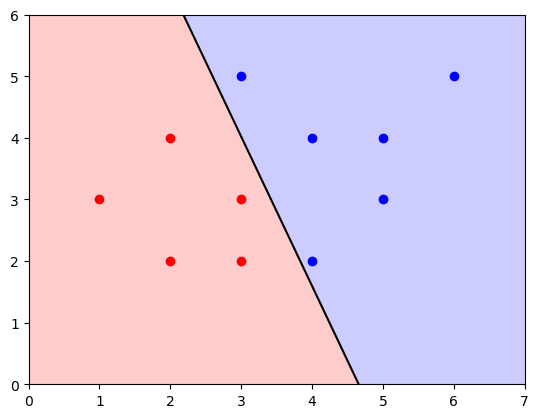

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Define our points
coords_x1 = np.array([1,2,3,3,2,3,5,5,6,4,4])
coords_x2 = np.array([3,2,3,2,4,5,3,4,5,4,2])
class_y = np.array([1,1,1,1,1,-1,-1,-1,-1,-1,-1])

# Our linear model is y = w_0 + w1 * x1 + w_2 * x2 + w3 * x1**2 + w4 * x2**2 + w5 *x1*x2, setup <the X matrix and Y vector
X = np.stack([np.ones_like(coords_x1), coords_x1, coords_x2], axis=1)
Y = class_y
print(X)

# Estimate model paramaters using pseudo-inverse
Xinv = np.linalg.inv(X.T @ X) @ X.T
model = Xinv @ Y
print(model)

# # Retrieve model parameters
model = model.flatten()
w0 = model[0]
w1 = model[1]
w2 = model[2]
print(f"w0: {w0:.4f}\nw1: {w1:.4f}\nw2: {w2:.4f}")

# Our decision boundary now satisfies
#       0 = w0 + w1*x1 + w2*x2
# <==>  x2 = -w1/w2 * x1 - w0/w2 
m = -w1 / w2
b = -w0 / w2

# Plot them
blue_indices = (class_y == -1)
red_indices = (class_y == 1)
print(blue_indices)

plt.plot(coords_x1[blue_indices], coords_x2[blue_indices], 'bo')
plt.plot(coords_x1[red_indices], coords_x2[red_indices], 'ro')

x = np.linspace(-11,11,100)
#plt.plot(x,m*x+b,"k")


# Let us calculate the decision value for all points in the domain from -11 to 11
# and do a contour plot
x1, x2 = np.meshgrid(np.linspace(-11,11,10), np.linspace(-11,11,10))
z = w0 + w1 * x1 + w2 * x2 
plt.contourf(x1, x2, z, levels=[-10,0,10], colors=["b","r"], alpha=.2)
plt.contour(x1, x2, z, levels=[0], colors=["k"])
plt.xlim((0,7))
plt.ylim((0,6))
plt.show()